In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
from matplotlib.ticker import FuncFormatter

warnings.simplefilter('ignore', UserWarning)

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline 
# inline
# plt.style.use('fivethirtyeight')

dpi = 150
mpl.rcParams['figure.dpi'] = dpi  # inline display, 150 - 300
mpl.rc("savefig", dpi=dpi)
mpl.rcParams['figure.figsize'] = (4,3)   # default, 指定图片大小，否则设置dpi之后图片可能较大

print(mpl.__version__)

2.2.2


## 生成数据

In [2]:
np.random.seed(777)
data = np.random.normal(0, 1, size=100).reshape(50, 2)
x = data[:, 0]
y = data[:, 1]

## 基本画图

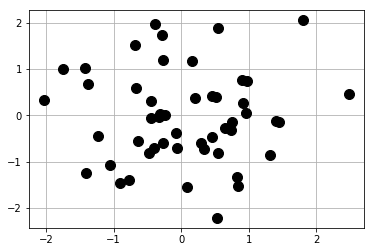

In [3]:
plt.plot(x, y, 'ko', markersize=10)
plt.grid()       # 虚线
plt.show(True)   # block = True

## x, y轴等刻度

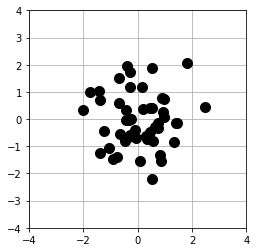

In [4]:
def get_new_ax():
    plt.clf()
    ax = plt.gca()
    plt.grid()
    return ax

ax = get_new_ax()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal', 'box')
ax.plot(x, y, 'ko', ms=10)  # ms: markersize
plt.show()

## 多图比较

### 1. 多窗口

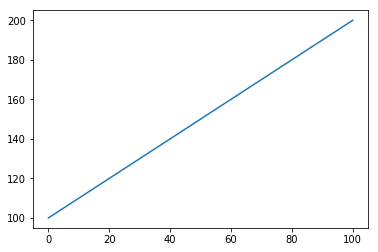

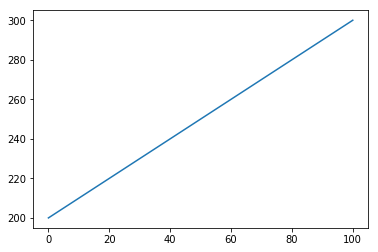

In [5]:
data = np.arange(100, 201)
plt.plot(data)

data2 = np.arange(200, 301)
plt.figure()
plt.plot(data2)

plt.show()

### 2. 多子图

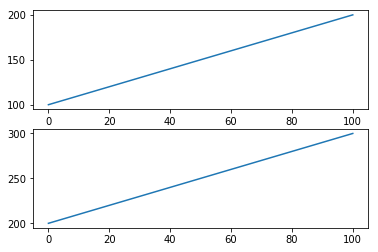

In [6]:
# plt.subplot(2, 1, 1)   # 2 rows, 1 col, and first figure
plt.subplot(211)         # same above
plt.plot(data)
# plt.subplot(2, 1, 2)   # 2 rows, 1 col, and second figure
plt.subplot(212)         # same above
plt.plot(data2)
plt.show()

## [散点图](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)

In [7]:
np.repeat([0, 1, 2, 3, 4, 5], 6)[::-1]

array([5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [8]:
np.array([list(range(6))[::-1] for _ in range(6)]).reshape(-1)

array([5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1,
       0, 5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0])

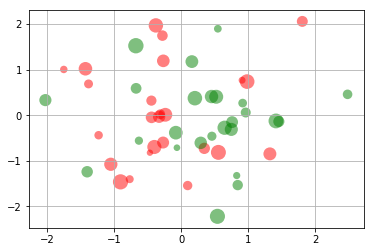

In [9]:
ax = get_new_ax()

ax.scatter(
    x, y,
    s=[40 + 4 * i for i in range(len(x))],     # size, scalar or number
    c=['r', 'g'],   # color 
    marker='o', 
    alpha=0.5,
    # facecolors='none',   # 不能与c混用
    edgecolors='none',
)
plt.show()

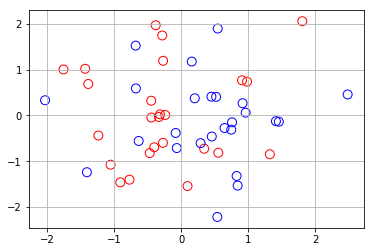

In [10]:
ax = get_new_ax()

ax.scatter(
    x, y,
    s=80,
    facecolors='none',
    edgecolors=['r', 'b'],
)
plt.show()

## [常用maker](https://matplotlib.org/api/markers_api.html#matplotlib.markers.MarkerStyle)

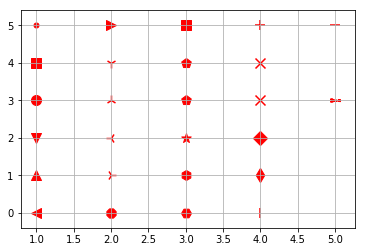

In [11]:
ax = get_new_ax()

# x = np.linspace(0, 1, 36)
# y = np.arange(0, 1, 1/36)
x1 = np.repeat(np.arange(1, 6.1), 6)
y1 = np.array([list(range(6))[::-1] for _ in range(6)]).reshape(-1)
markers = [
    "." ,	# point
    "," ,	# pixel
    "o" ,	# circle
    "v" ,	# triangle_down
    "^" ,	# triangle_up
    "<" ,	# triangle_left
    ">" ,	# triangle_right
    "1" ,	# tri_down
    "2" ,	# tri_up
    "3" ,	# tri_left
    "4" ,	# tri_right
    "8" ,	# octagon
    "s" ,	# square
    "p" ,	# pentagon
    "p" ,	# plus (filled), Unrecognized marker style P
    "*" ,	# star
    "h" ,	# hexagon1
    "H" ,	# hexagon2
    "+" ,	# plus
    "x" ,	# x
    "x" ,	# x (filled), X unrecognized
    "D" ,	# diamond
    "d" ,	# thin_diamond
    "|" ,	# vline
    "_" ,	# hline
    "None" , # " " or "" 	nothing
    '$\sum{(a + b)}$', # 	render the string using mathtext.    
]
for ix, m in enumerate(markers):
    ax.scatter(x1[ix], y1[ix], s=100, c='r', marker=m)
plt.show()

## [线图](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

第三个参数fmt的格式为

```fmt = '[color][marker][line]'```

**color:**

| character | color |
| --------- |:-----:| 
| 'b'	| blue     |
| 'g'	| green    | 
| 'r'	| red      |
| 'c'	| cyan     |  
| 'm'	| magenta  | 
| 'y'	| yellow   |  
| 'k'	| black    | 
| 'w'	| white    |  

**line styles**

character | description
:------  | :---------
'-'	    |  solid line style
'--'	|  dashed line style
'-.'	|  dash-dot line style
':'	    |  dotted line style

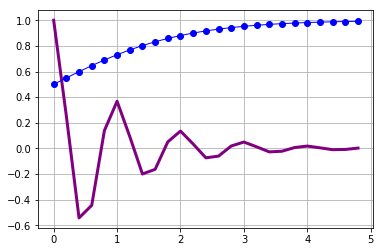

In [12]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


def s(t):
    return 1 / (1 + np.exp(-t))

x = np.arange(0.0, 5.0, 0.2)
y = f(x)

ax = get_new_ax()
plt.set_cmap('PRGn')
ax.plot(x, y, 'purple', linewidth=3)        # plot 即是画线的接口
ax.plot(x, s(x), 'bo-', linewidth=1)        # 点线结合 o -> marker, "-" or "--" -> linestyle
plt.show()

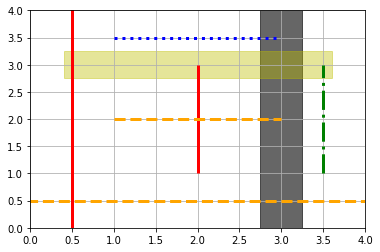

In [13]:
ax = get_new_ax()

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.set_cmap('Spectral')
ax.vlines(x=2, ymin=1, ymax=3, colors='red', linestyles='solid', linewidth=3)
ax.vlines(x=0.5, ymin=-1, ymax=5, colors='red', linestyles='solid', linewidth=3)
ax.hlines(y=2, xmin=1, xmax=3, colors='orange', linestyles='dashed', linewidth=3)
ax.hlines(y=0.5, xmin=-1, xmax=5, colors='orange', linestyles='dashed', linewidth=3)

# min, max 按照[0, 1]的比例，而不是真实刻度
ax.axvline(x=3.5, ymin=0.25, ymax=0.75, c="green", linestyle='dashdot', linewidth=3)
ax.axhline(y=3.5, xmin=0.25, xmax=0.75, c="blue", linestyle='dotted', linewidth=3)

# span rectangle
ax.axvspan(xmin=2.75, xmax=3.25, ymin=0, ymax=1, color="k", alpha=.6)
ax.axhspan(ymin=2.75, ymax=3.25, xmin=0.1, xmax=0.9, color="y", alpha=.4)

plt.show()

## [柱状图](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)

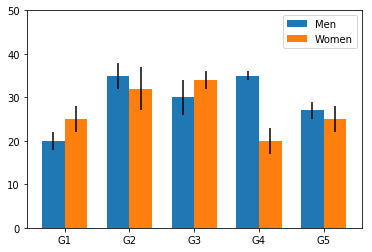

In [14]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)

ind = np.arange(N)
width = 0.35
b1 = plt.bar(ind, menMeans, width, yerr=menStd)
b2 = plt.bar(ind+width, womenMeans, width, yerr=womenStd)

# reset xticks and labels
plt.xticks(ind+width*0.5, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 51, 10))

# add legend
plt.legend((b1[0], b2[0]), ('Men', 'Women'))

plt.show()

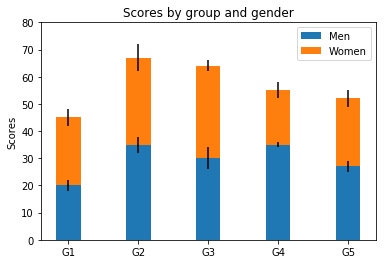

In [15]:
p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

## [boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)

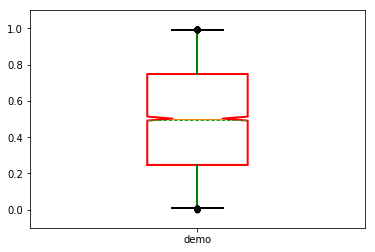

In [16]:
x = np.random.random(size=5000)
ax = plt.gca()
ax.set_ylim(-0.1, 1.1)
plt.boxplot(x, 
            notch=True,        # represent the confidence interval around the median
            sym='ko',            # outlier显示方式
            vert=True,          # 水平或是垂直展示
            whis=[1, 99],         # float, Q3 - whis*IQR, Q3 + whis*IQR, 'range' -> full, [] -> 1 percentage
            widths=[0.3],
            labels=['demo'],
            # 是否展示均值线
            showmeans=True,
            meanline=True,
            
            # 调整更细致的属性
            capprops = {'linewidth': 2, 'color': 'k'},
            boxprops = {'linewidth': 2, 'color': 'r', },
            whiskerprops = {'linewidth': 2, 'color': 'g'},
            flierprops = {'markersize': 5, 'alpha': 0.3, 'color': 'b'},    # alpha, color not help
            medianprops ={},
            meanprops={}
            
           )
plt.show()

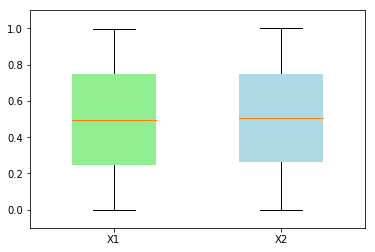

In [17]:
x1 = np.random.random(size=5000)
x2 = np.random.random(size=5000)
ax = plt.gca()
ax.set_ylim(-0.1, 1.1)
bp = plt.boxplot([x1, x2], labels=['X1', 'X2'],
                 widths=[.5, .5],
                 boxprops = {'color': 'none'},
                 patch_artist=True)   # fill with color

colors = ['lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

## [饼图](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)

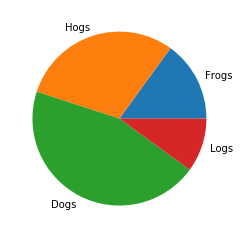

In [18]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

ax = plt.gca()
ax.set_aspect('equal')      # to make square figures and axies
plt.pie(fracs, labels=labels)

plt.show()

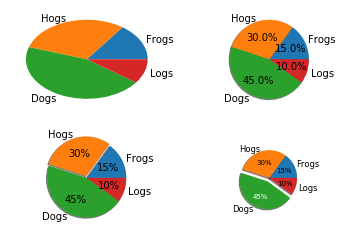

In [19]:
explode = (0, 0.05, 0, 0)
the_grid = plt.GridSpec(2, 2)

plt.subplot(the_grid[0, 0])
plt.pie(fracs, labels=labels)

plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(fracs, labels=labels, autopct='%.1f%%', shadow=True)

plt.subplot(the_grid[1, 0], aspect=1)
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)

plt.subplot(the_grid[1, 1], aspect=1)
patches, texts, autotexts = plt.pie(fracs, labels=labels, 
                                    explode=(0, 0, .1, 0),
                                    autopct='%.0f%%', shadow=True, 
                                    radius=.7)    # 减小figure 大小
for t in texts:
    t.set_size('smaller')       # 外层字符

for t in autotexts:             # 内层数据字符
    t.set_size('x-small')
    
autotexts[2].set_color('w')     # 选择数据设置颜色

plt.show()

## [直方图](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)

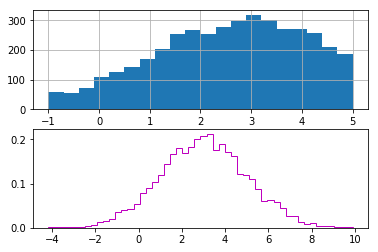

In [20]:
x = np.random.normal(3, 2, size=5000)

plt.subplot(211)
plt.hist(x, bins=20, 
         range=(-1, 5),
        )
plt.grid()
plt.subplot(212)
plt.hist(x, bins=50, edgecolor='m',
         density=True, histtype='step',   # 'bar', 'barstacked', 'step', 'stepfilled'
         orientation='vertical',        # horizontal, vertical
        )
plt.show()

## 圆

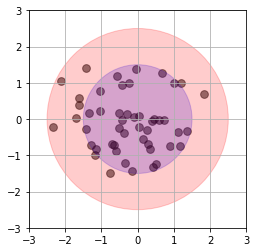

In [21]:
data = np.random.normal(0, 1, size=100).reshape(50, 2)
x = data[:, 0]
y = data[:, 1]

ax = get_new_ax()

ax.scatter(x, y, s=60, c='k', alpha=0.5, marker='o')

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal', 'box')
c = plt.Circle(xy=(0, 0), radius=1.5, color='b', alpha=0.2)
ax.add_artist(c)
c = plt.Circle(xy=(0, 0), radius=2.5, color='r', alpha=0.2)
ax.add_artist(c)

plt.show()

## 日期类数据

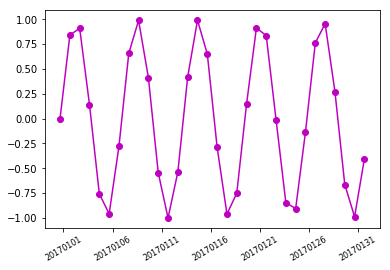

In [22]:
x = pd.date_range('20170101', '20170201')
y = np.sin(np.arange(len(x)))

from matplotlib.dates import DateFormatter, RRuleLocator, rrulewrapper, DAILY

fig, ax = plt.subplots()
plt.plot_date(x, y, 'mo-')

formatter = DateFormatter('%Y%m%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=8)

rule = rrulewrapper(DAILY, interval=5)      # wrapper of dateutil.rrule
loc = RRuleLocator(rule)
ax.xaxis.set_major_locator(loc)

plt.show()

## 动态更新

In [23]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

# plt.show()
# HTML(ani.to_html5_video())
# print("Done")
rc('animation', html='html5')
plt.close(ani._fig)     # 避免画最后的图像
ani

## 图的布局


**Figures**

A figure is the windows in the GUI that has "Figure #" as title. Figures are numbered starting from 1 as opposed to the normal Python way starting from 0. This is clearly MATLAB-style. 有点像R中的device.

**Subplots**

With subplot you can arrange plots in a regular grid. You need to specify the number of rows and columns and the number of the plot. Note that the gridspec command is a more powerful alternative.

**Axes**

are very similar to subplots but allow **placement** of plots at any location in the figure. So if we want to put a smaller plot inside a bigger one we do so with axes.

**[Ticks](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.LinearLocator)**

include tick locators and tick formatters.

```
ax.xaxis.set_major_formatter(xmajor_formatter)
ax.xaxis.set_major_locator(xmajor_locator)
```

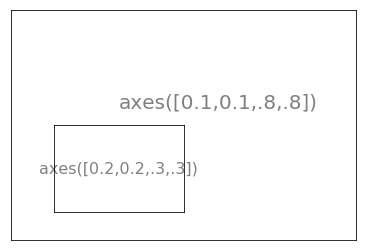

In [24]:
plt.axes([0.1,0.1,.8,.8])
plt.xticks([]), plt.yticks([])
plt.text(0.6,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

plt.axes([0.2,0.2,.3,.3])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'axes([0.2,0.2,.3,.3])',ha='center',va='center',size=16,alpha=.5)

plt.show()

## 标题和图例

标题的资料可以参考[官方教程](https://matplotlib.org/users/index_text.html)

create text method:

1. text(),     添加文字到axes中的任意位置
2. xlabel(), ylabel()
3. title(),    axes title
4. figtext(),  figure text
5. suptitle(), figure title
6. annotate(), to axes, text with **arrow**.

图例教程可以参考[官方guide](https://matplotlib.org/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py)

简单的可以直接调用下面三种方法:

1. plt.legend()
2. plt.legend(labels)
3. plt.legend(handles, labels)

其他参数如:

    loc:       best, upper right, lower left, center, center left etc.
    fontsize:  xx-small, x-small, small, medium, large, x-large, xx-large
    fancybox:  True/False, None
    shadow:    None or bool
    facecolor: bg color
    edgecolor: bg patch edge color

## 优化做图

In [25]:
print(plt.style.available)

['seaborn', 'seaborn-talk', 'seaborn-whitegrid', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-colorblind', 'seaborn-bright', 'ggplot', 'seaborn-poster', 'seaborn-muted', 'classic', '_classic_test', 'Solarize_Light2', 'grayscale', 'seaborn-paper', 'seaborn-notebook', 'fast', 'bmh', 'seaborn-ticks', 'seaborn-deep', 'seaborn-darkgrid', 'seaborn-pastel', 'seaborn-dark', 'dark_background', 'tableau-colorblind10', 'seaborn-white']


In [26]:
plt.style.use('fivethirtyeight')   
# plt.style.use('seaborn-paper')

In [27]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

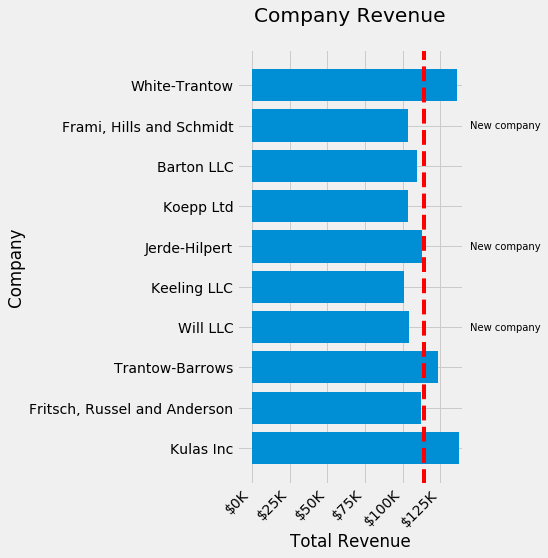

In [28]:

# modify 4
plt.rcParams.update({'figure.autolayout': True})

# modify 6
fig, ax = plt.subplots(figsize=(8, 8))

# modify 4
# fig.set_tight_layout(False)  # suppress warning: This figure includes Axes that are not compatible 

# modify 5, not working, because modify 2 xlim should minimize the negative number
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html
ax.tick_params(axis='y', which='major', length=0.1)

ax.barh(group_names, group_data,
       align="center")   # modify 3

# modify 7
ax.axvline(group_mean, ls='--', color='r')

# 标记额外信息
for group in [3, 5, 8]:
    ax.text(145000, group, "New company", fontsize=10, verticalalignment="center")


# modify 1
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')   # set property of many items at once

# modify 2
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')

# modify 6
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s


formatter = FuncFormatter(currency)

# 标题移动高一点
ax.title.set(y=1.05)
# 设置x轴label的格式
ax.xaxis.set_major_formatter(formatter)
#
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

## 保存图片

In [29]:
print(fig.canvas.get_supported_filetypes())

{'tiff': 'Tagged Image File Format', 'jpg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'svgz': 'Scalable Vector Graphics', 'eps': 'Encapsulated Postscript', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics'}


In [30]:
# uncomment to save
# https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig
fig.savefig('sales.png', transparent=False, dpi=160, bbox_inches="tight")

## 加载图片文件

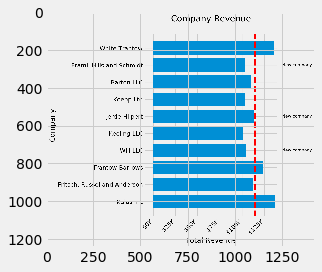

In [31]:
plt.imshow(mpimg.imread('sales.png'))      # load with poor quality

In [32]:
from PIL import Image
#Read image
im = Image.open( 'sales.png' )
#Display image
# im.show()  # use external display tool

## 额外资源

1. [matplotlib画图API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)
2. [the lifecycle of a plot](https://matplotlib.org/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py) 非常值得一看
3. [linestyles 补充](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py)
4. [修改ticks的函数](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html)
5. [特别详尽的例子，画质精美](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)